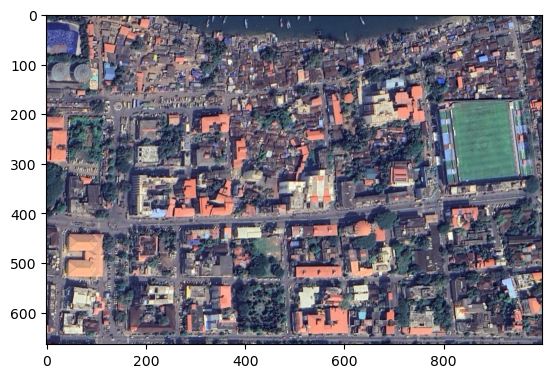

In [117]:
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.image as mpimg
img = mpimg.imread('D:\Hackenza\hackenzahirez.png')
plt.imshow(img)
plt.show()

Enter node coordinates (format: x,y separated by comma, each new node on a new line): 104,11 214,40 193,163 122,163 150,203 44,203 37,415 31,533 24,646 122,537 142,306 124,424 124,651 365,162 361,188 289,194 288,307 368,306 299,415 376,414 378,532 265,417 266,535 271,650 381,646 489,535 491,650 483,407 589,406 605,533 617,650 696,389 707,528 714,653 825,651 794,378 979,653 890,371 990,347 940,32 751,86 556,142 165,420 167,537 167,655


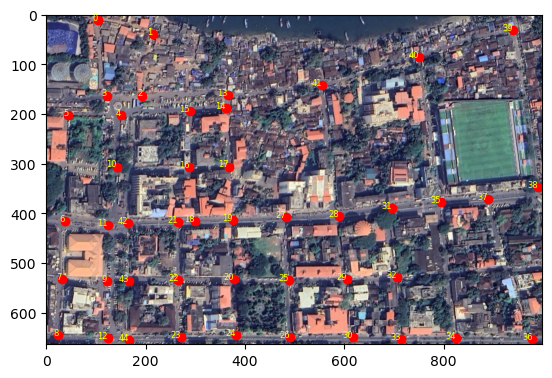

Enter edge connections (format: node1 node2 separated by space, each new edge on a new line): 8,12 12,44 44,23 23,24 24,26 26,30 30,33 33,34 34,36 36,38 32,29 29,25 25,20 20,22 22,43 9,7 32,33 29,30 25,26 20,24 22,23 43,44 9,12 7,8 6,11 11,42 42,21 21,18 18,19 19,27 27,28 28,31 31,35 35,37 37,38 37,36 35,34 31,32 28,29 27,25 19,20 21,22 42,43 11,9 6,7 38,39 39,40 40,41 41,13 13,14 40,35 41,28 14,17 17,19 14,15 15,16 16,18 0,1 1,2 2,3 3,0 4,2 3,4 5,4 4,10 5,6 10,11 10,16 4,15 2,13 16,17


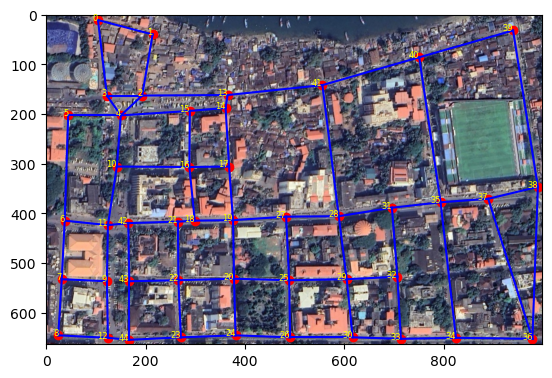

In [111]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'img' is your background image, make sure you have it defined somewhere in your code

# Input node coordinates
nodes_data = input("Enter node coordinates (format: x,y separated by comma, each new node on a new line): ")
nodes_list = nodes_data.strip().split(" ")
nodes = [tuple(map(int, node.split(","))) for node in nodes_list]

# Plot nodes on the first image
fig, ax = plt.subplots()
cnt=0
for node in nodes:
    x, y = node
    ax.scatter(x, y, color='red')  # Plot nodes as red dots
    ax.text(x, y, cnt, fontsize=6, ha='right', color='yellow')  # Add label to node
    cnt+=1

ax.set_xlim(0, img.shape[1])
ax.set_ylim(img.shape[0], 0)
ax.imshow(img)
plt.show()

# Function to draw edges between nodes
def draw_edges(node1, node2):
    x1, y1 = nodes[node1]
    x2, y2 = nodes[node2]
    plt.plot([x1, x2], [y1, y2], color='blue')  # Plot edges as blue lines

# Input edge connections
edges_data = input("Enter edge connections (format: node1 node2 separated by space, each new edge on a new line): ")
edges_list = edges_data.strip().split(" ")
edges = [tuple(map(int, edge.split(","))) for edge in edges_list]

# Plot nodes and edges on the second image
fig, ax = plt.subplots()
cnt=0
for node in nodes:
    x, y = node
    ax.scatter(x, y, color='red')  # Plot nodes as red dots
    ax.text(x, y, cnt, fontsize=6, ha='right', color='yellow')  # Add label to node
    cnt+=1

for edge in edges:
    draw_edges(edge[0], edge[1])

ax.set_xlim(0, img.shape[1])
ax.set_ylim(img.shape[0], 0)
ax.imshow(img)
plt.show()


In [115]:
#TAKE INPUT
water_levels_data = input("Enter water levels separated by commas: ")
water_levels_list = water_levels_data.split(",")
input_data = [float(level) for level in water_levels_list]
print(input_data)

Enter water levels separated by commas: 0.5,-1,0.166666667,0.089285714,0.125,0.333333333,0.138888889,0.625,0.238095238,0.5,0.111111111,1.666666667,0.5,0.111111111,0.111111111,0.2,0.25,0.069444444,-1.0,0.555555556,0.833333333,1.666666667,0.092592593,0.138888889,0.555555556,0.119047619,0.138888889,1.25,0.142857143,0.25,0.166666667,0.119047619,0.5,0.833333333,0.277777778,0.2,0.333333333,0.238095238,0.333333333,0.185185185,0.079365079,0.092592593,0.625,0.357142857,0.069444444,0.142857143,1.666666667,0.833333333,0.625,0.416666667,0.079365079,0.25,0.092592593,0.142857143,0.166666667,0.142857143,0.071428571,0.833333333,0.083333333,0.555555556,0.25,0.083333333,0.555555556,0.138888889,0.3125,0.142857143,0.277777778,0.208333333,0.3125,0.625,0.119047619,0.104166667
[0.5, -1.0, 0.166666667, 0.089285714, 0.125, 0.333333333, 0.138888889, 0.625, 0.238095238, 0.5, 0.111111111, 1.666666667, 0.5, 0.111111111, 0.111111111, 0.2, 0.25, 0.069444444, -1.0, 0.555555556, 0.833333333, 1.666666667, 0.092592593, 

In [116]:
from math import sqrt

# Function to calculate the distance between two points (x1, y1) and (x2, y2)
def distance(x1, y1, x2, y2):
    return sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

def morotic(nodes, edges, level):
    n = len(nodes) # Number of nodes
    m = len(edges) # Number of edges

    # Create a list to store the indices of edges with missing values
    missing_edges = []

    # Find the indices of edges with missing values (-1)
    for i in range(m):
        if level[i] == -1:
            missing_edges.append(i)

    # Iterate through each missing edge and compute its missing value
    for missing_idx in missing_edges:
        # Extract the indices of nodes connected by the missing edge
        x, y = edges[missing_idx]

        # Calculate the midpoint of the missing edge
        mid_x = (nodes[x][0] + nodes[y][0]) / 2
        mid_y = (nodes[x][1] + nodes[y][1]) / 2

        # Find the distance of each edge's midpoint from the midpoint of the missing edge
        distances = []
        for i in range(m):
            if i != missing_idx and level[i] != -1:
                a, b = edges[i]
                mid_a_x = (nodes[a][0] + nodes[b][0]) / 2
                mid_a_y = (nodes[a][1] + nodes[b][1]) / 2
                dist = distance(mid_x, mid_y, mid_a_x, mid_a_y)
                distances.append(dist)
            else:
                distances.append(-1)

        # Calculate the inverse distance weights
        weights = []
        total_weight = 0.0
        for dist in distances:
            if dist != -1 and dist != 0:
                weight = 1.0 / dist
                total_weight += weight
                weights.append(weight)
            else:
                weights.append(0)

        missing_value = 0.0
        for i in range(len(distances)):
            edge_level = level[i]
            missing_value += (weights[i] / total_weight) * edge_level

        # Round the missing value to the nearest integer and update the level array
        level[missing_idx] = missing_value

    # Return the completed list level with no missing values
    return level
m1 = morotic(nodes, edges, input_data)
print(m1)
for i, val in enumerate(m1):
    print(f"Edge {i}: {val}")

[0.5, 0.4004790020018227, 0.166666667, 0.089285714, 0.125, 0.333333333, 0.138888889, 0.625, 0.238095238, 0.5, 0.111111111, 1.666666667, 0.5, 0.111111111, 0.111111111, 0.2, 0.25, 0.069444444, 0.37738009710781534, 0.555555556, 0.833333333, 1.666666667, 0.092592593, 0.138888889, 0.555555556, 0.119047619, 0.138888889, 1.25, 0.142857143, 0.25, 0.166666667, 0.119047619, 0.5, 0.833333333, 0.277777778, 0.2, 0.333333333, 0.238095238, 0.333333333, 0.185185185, 0.079365079, 0.092592593, 0.625, 0.357142857, 0.069444444, 0.142857143, 1.666666667, 0.833333333, 0.625, 0.416666667, 0.079365079, 0.25, 0.092592593, 0.142857143, 0.166666667, 0.142857143, 0.071428571, 0.833333333, 0.083333333, 0.555555556, 0.25, 0.083333333, 0.555555556, 0.138888889, 0.3125, 0.142857143, 0.277777778, 0.208333333, 0.3125, 0.625, 0.119047619, 0.104166667]
Edge 0: 0.5
Edge 1: 0.4004790020018227
Edge 2: 0.166666667
Edge 3: 0.089285714
Edge 4: 0.125
Edge 5: 0.333333333
Edge 6: 0.138888889
Edge 7: 0.625
Edge 8: 0.238095238
Edge

In [ ]:
#GNN Input
m2_data = input("Enter data separated by commas: ")
m2_list = m2_data.split(",")
m2 = [float(level) for level in m2_list]
print(m2)

In [ ]:
water_levels = input_data

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'img' is your background image, make sure you have it defined somewhere in your code

# Function to draw nodes
def draw_nodes(ax, nodes):
    cnt = 0
    for node in nodes:
        x, y = node
        ax.scatter(x, y, color='red')  # Plot nodes as red dots
        ax.text(x, y, cnt, fontsize=6, ha='right', color='yellow')  # Add label to node
        cnt += 1

# Function to draw edges with varying shades of blue based on water level values
def draw_edges(ax, nodes, edges, water_levels):
    for idx, (node1, node2) in enumerate(edges):
        x1, y1 = nodes[node1]
        x2, y2 = nodes[node2]
        water_level = water_levels[idx]  # Water level for this edge
        color = (0, 0, 1 - water_level / 10)  # Adjust blue component based on water level
        if(water_level == -1):
            color = "red"
        ax.plot([x1, x2], [y1, y2], color=color, linewidth=4)  # Plot edge with varying shade of blue

# Clean map without any nodes or edges plotted yet
fig, ax = plt.subplots()
ax.imshow(img)



# Plot nodes on the clean map
draw_nodes(ax, nodes)


# Input water level values
#water_levels_data = input("Enter water level values (format: space-separated values): ")
#water_levels = list(map(float, water_levels_data.strip().split()))

# Plot edges with varying shades of blue based on water level values
draw_edges(ax, nodes, edges, water_levels)

plt.show()


In [ ]:
water_levels = m1 + m2

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'img' is your background image, make sure you have it defined somewhere in your code

# Function to draw nodes
def draw_nodes(ax, nodes):
    cnt = 0
    for node in nodes:
        x, y = node
        ax.scatter(x, y, color='red')  # Plot nodes as red dots
        ax.text(x, y, cnt, fontsize=6, ha='right', color='yellow')  # Add label to node
        cnt += 1

# Function to draw edges with varying shades of blue based on water level values
def draw_edges(ax, nodes, edges, water_levels):
    for idx, (node1, node2) in enumerate(edges):
        x1, y1 = nodes[node1]
        x2, y2 = nodes[node2]
        water_level = water_levels[idx]  # Water level for this edge
        color = (0, 0, 1 - water_level / 10)  # Adjust blue component based on water level
        if(water_level == -1):
            color = "red"
        ax.plot([x1, x2], [y1, y2], color=color, linewidth=4)  # Plot edge with varying shade of blue

# Clean map without any nodes or edges plotted yet
fig, ax = plt.subplots()
ax.imshow(img)



# Plot nodes on the clean map
draw_nodes(ax, nodes)


# Input water level values
water_levels_data = input("Enter water level values (format: space-separated values): ")
water_levels = list(map(float, water_levels_data.strip().split()))

# Plot edges with varying shades of blue based on water level values
draw_edges(ax, nodes, edges, water_levels)

plt.show()
